In [1]:
from torch.utils.data import DataLoader
from datasets import Dataset
import pandas as pd
from preprocess_stock_data import process_apple_data
import numpy as np



/Users/Neha.Duggirala/Library/CloudStorage/OneDrive-Shell/Projects/NLP/Attention/RNN/preprocess_stock_data.py:23: SyntaxWarning: invalid escape sequence '\$'
  df['Close/Last'] = df['Close/Last'].replace({'\$': ''}, regex=True).astype(float)
/Users/Neha.Duggirala/Library/CloudStorage/OneDrive-Shell/Projects/NLP/Attention/RNN/preprocess_stock_data.py:24: SyntaxWarning: invalid escape sequence '\$'
  df['Open'] = df['Open'].replace({'\$': ''}, regex=True).astype(float)
/Users/Neha.Duggirala/Library/CloudStorage/OneDrive-Shell/Projects/NLP/Attention/RNN/preprocess_stock_data.py:25: SyntaxWarning: invalid escape sequence '\$'
  df['High'] = df['High'].replace({'\$': ''}, regex=True).astype(float)
/Users/Neha.Duggirala/Library/CloudStorage/OneDrive-Shell/Projects/NLP/Attention/RNN/preprocess_stock_data.py:26: SyntaxWarning: invalid escape sequence '\$'
  df['Low'] = df['Low'].replace({'\$': ''}, regex=True).astype(float)


# Preprocess pipeline

In [2]:
file_path = 'HistoricalQuotes.csv'
df = process_apple_data(file_path)
df.head()

,Date,Last,Volume,Open,High,Low
2517,2010-03-01,29.8557,137312041,29.3928,29.9286,29.3500
2516,2010-03-02,29.8357,141486282,29.9900,30.1186,29.6771
2515,2010-03-03,29.9043,92846488,29.8486,29.9814,29.7057
2514,2010-03-04,30.1014,89591907,29.8971,30.1314,29.8043
2513,2010-03-05,31.2786,224647427,30.7057,31.3857,30.6614


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2518 entries, 2517 to 0
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2518 non-null   datetime64[ns]
 1   Last    2518 non-null   float64       
 2   Volume  2518 non-null   int64         
 3   Open    2518 non-null   float64       
 4   High    2518 non-null   float64       
 5   Low     2518 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 137.7 KB


In [4]:
df.columns

Index(['Date', 'Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')

In [5]:
columns_to_normalize = ['Volume', 'Open', 'High', 'Low']

# Normalize each column in place using map
df[columns_to_normalize] = df[columns_to_normalize].apply(
    lambda col: (col - col.min()) / (col.max() - col.min())
)


In [6]:
df.drop(columns=['Date','Volume'],inplace=True)

In [7]:
df.head()

,Last,Open,High,Low
2517,29.8557,0.000000,0.000000,0.003004
2516,29.8357,0.002022,0.000638,0.004113
2515,29.9043,0.001543,0.000177,0.004210
2514,30.1014,0.001707,0.000681,0.004544
2513,31.2786,0.004445,0.004891,0.007451


In [8]:
from sklearn.model_selection import train_test_split
train_df,test_df = train_test_split(df,test_size=0.2,train_size=0.8, shuffle=False)

val_df,test_df = train_test_split(test_df, test_size=0.5, train_size=0.5, shuffle=False)



In [9]:
# Split train data
train_X = train_df.drop(columns=['Last'])
train_y = train_df['Last']

# Split test data
test_X = test_df.drop(columns=['Last'])
test_y = test_df['Last']

# Split validation data
val_X = val_df.drop(columns=['Last'])
val_y = val_df['Last']

In [10]:
train_X = np.array(train_X).reshape(-1,1,3)
test_X = np.array(test_X).reshape(-1,1,3)
val_X = np.array(val_X).reshape(-1,1,3)


train_y = np.array(train_y).reshape(-1,1,1)
test_y = np.array(test_y).reshape(-1,1,1)
val_y = np.array(val_y).reshape(-1,1,1)

In [11]:
train_X.shape

(2014, 1, 3)

# Build Model

## RNN

In [43]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, LSTM, Dropout
from keras.optimizers import Adam, SGD


In [44]:
# Define the model
model = Sequential()


# Define the LSTM layer with the corrected input shape
model.add(LSTM(128, input_shape=(train_X.shape[1], train_X.shape[2]),return_sequences=True)),
Dropout(0.2),
model.add(LSTM(64, return_sequences=True)) ,
Dropout(0.2),
# model.add(LSTM(10, return_sequences=True)) 
model.add(Dense(1))

In [45]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 1, 128)         │        67,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 1, 64)          │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1, 1)           │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,057 (457.25 KB)

 Trainable params: 117,057 (457.25 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
from tensorflow.keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

model.compile(optimizer = "rmsprop", loss = root_mean_squared_error, 
              metrics =["accuracy"])

In [60]:
# Fit the model
history = model.fit(train_X,train_y , validation_data=(val_X, val_y),epochs=100, batch_size=16)

Epoch 1/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0000e+00 - loss: 97.7605 - val_accuracy: 0.0000e+00 - val_loss: 175.4879
Epoch 2/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 85.0396 - val_accuracy: 0.0000e+00 - val_loss: 165.5791
Epoch 3/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 77.1915 - val_accuracy: 0.0000e+00 - val_loss: 159.2741
Epoch 4/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 71.5520 - val_accuracy: 0.0000e+00 - val_loss: 153.0219
Epoch 5/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 66.5444 - val_accuracy: 0.0000e+00 - val_loss: 146.7878
Epoch 6/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 60.3937 - val_accuracy: 0.0000e+00 - val_loss: 140.5733
Epoch 7/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 55.5554 - val_accuracy: 0.0000e+00 - val_loss: 134.3642
Epoch 8/100
126/126 

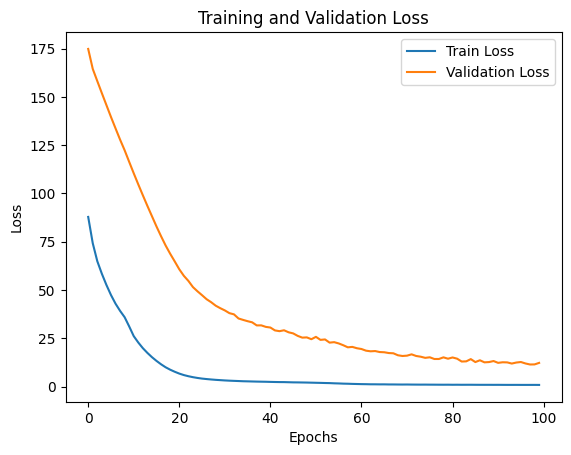

In [48]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [36]:
preicted_y = model.predict(test_X)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


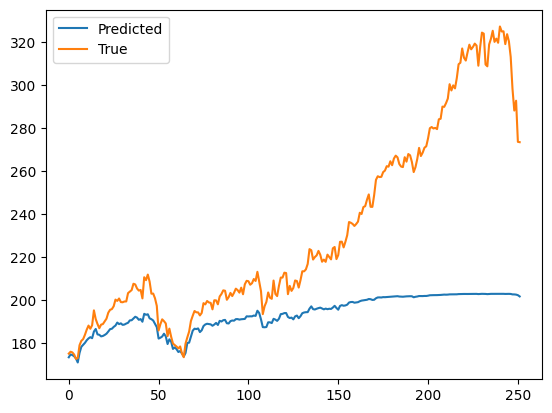

In [37]:
plt.plot(preicted_y.reshape(-1), label='Predicted')
plt.plot(test_y.reshape(-1), label="True")  

plt.legend()

## Grid search

In [23]:
%pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 948.9 kB/s eta 0:00:000:00:01
Note: you may need to restart the kernel to use updated packages.


In [29]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the model as a function for Keras Tuner
def build_model(hp):
    model = Sequential([
        LSTM(
            units=hp.Int('units', min_value=50, max_value=200, step=50),
            return_sequences=True,
            input_shape=(train_X.shape[1], train_X.shape[2])
        ),
        Dropout(hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)),
        LSTM(
            units=hp.Int('units', min_value=50, max_value=200, step=50),
            return_sequences=False
        ),
        Dropout(hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)),
        Dense(1)
    ])
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop','sgd']),
        loss=hp.Choice('loss',values = ['mse','rmse'])
    )
    return model

# Initialize the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,  # Number of random combinations to try
    executions_per_trial=1,
    directory='grid_search',
    project_name='lstm_tuning'
)

# Perform the search
tuner.search(train_X, train_y, epochs=50, validation_data=(val_X, val_y), verbose=1)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters: {best_hps.values}")

# Build the best model
best_model = tuner.hypermodel.build(best_hps)

Trial 10 Complete [00h 00m 10s]
val_loss: 3461.947998046875

Best val_loss So Far: 247.8174591064453
Total elapsed time: 00h 01m 10s
Best Hyperparameters: {'units': 100, 'dropout_rate': 0.1, 'optimizer': 'sgd', 'loss': 'mse'}
